# Handwritten Digit Classifier Neural Network Model on MNIST dataset 

## Importing Libraries

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix


## Loading and Exploring the MNIST dataset

In [67]:
# Loading the MNIST dataset
print("Loading the MNIST dataset...")
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("MNIST dataset loaded successfully.")

Loading the MNIST dataset...
MNIST dataset loaded successfully.


In [68]:
# Displaying basic information about the dataset
print("="*60)
print("BASIC INFORMATION")
print("="*60)
print(f"Training images shape: {X_train.shape}")
print(f"Training labels shape:{y_train.shape}")
print(f"Testing images shape: {X_test.shape}")
print(f"Testing labels shape: {y_test.shape}")
print(f"Pixel values range: {X_train.min()} to {X_train.max()}")
print(f"Data type:{X_train.dtype}")
print("-"*60)

BASIC INFORMATION
Training images shape: (60000, 28, 28)
Training labels shape:(60000,)
Testing images shape: (10000, 28, 28)
Testing labels shape: (10000,)
Pixel values range: 0 to 255
Data type:uint8
------------------------------------------------------------


SAMPLE IMAGE VISUALISATION
Displaying image at index 0
Label: 5
Image shape: (28, 28)


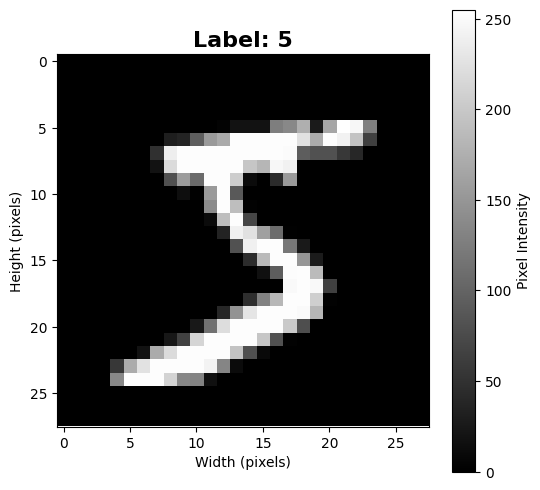


Sample pixel values (top-left 5×5 corner):
[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]


In [69]:
# Sample input
print("="*60)
print("SAMPLE IMAGE VISUALISATION")
print("="*60)

sample_idx = 0
sample_image = X_train[sample_idx]
sample_label = y_train[sample_idx]

print(f"Displaying image at index {sample_idx}")
print(f"Label: {sample_label}")
print(f"Image shape: {sample_image.shape}")

# Display the image
plt.figure(figsize=(6, 6))
plt.imshow(sample_image, cmap='gray')
plt.title(f"Label: {sample_label}", fontsize=16, fontweight='bold')
plt.colorbar(label='Pixel Intensity')
plt.xlabel('Width (pixels)')
plt.ylabel('Height (pixels)')
plt.show()

# Show a small section of actual pixel values
print("\nSample pixel values (top-left 5×5 corner):")
print(sample_image[:5, :5])


In [70]:
# Sample Output
print(f"First 5 labels:{y_train[:5]}")

First 5 labels:[5 0 4 1 9]


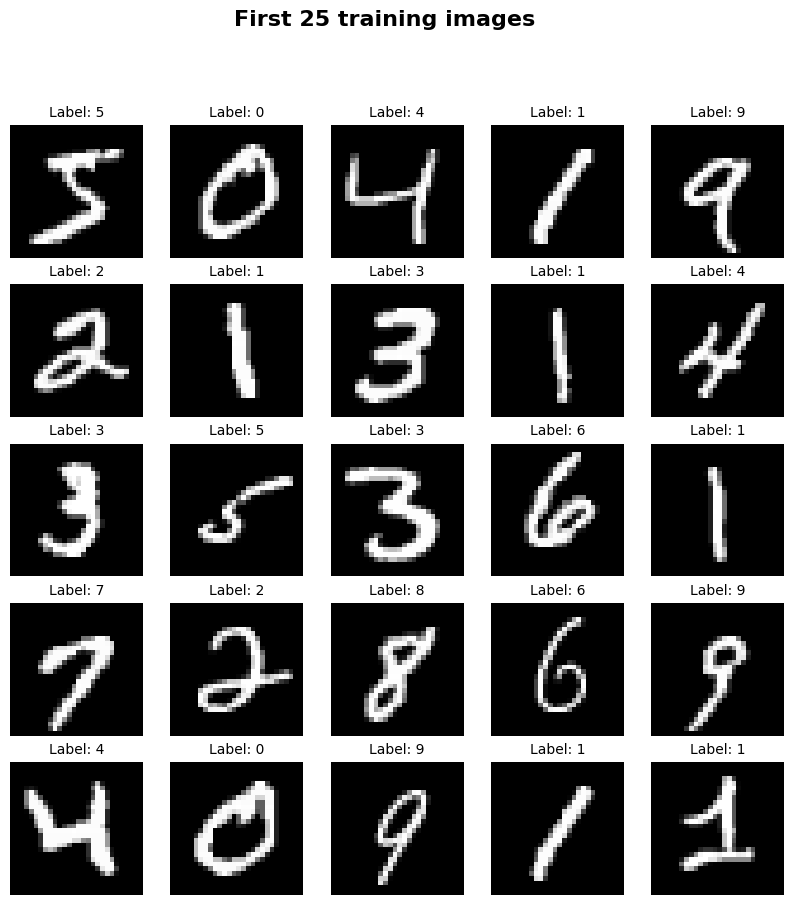

In [71]:
# VISUALIZE MULTIPLE IMAGES IN A GRID
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.title(f"Label: {y_train[i]}", fontsize="10")
    plt.axis('off')

plt.suptitle("First 25 training images", fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout
plt.show()

## Data Preprocessing

In [8]:
# Normalizing pixel values : 0 - 255 -> 0.0 - 1.0 
X_train = X_train/255.0
X_test = X_test/255.0

print(f"DATA NORMALIZED")
print(f"New Pixel range: {X_train.min():3f} to {X_train.max():3f}")

DATA NORMALIZED
New Pixel range: 0.000000 to 1.000000


In [9]:
# One-Hot Encoding Labels
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

print(f"One-Hot encoded Labels : {y_train[0]}")

One-Hot encoded Labels : [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [10]:
# Post-preprocessing results
print("\n" + "=" * 60)
print("POST-PREPROCESSING:")
print("=" * 60)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")
print(f"X_train datatype: {X_train.dtype}")
print(f"y_train datatype: {y_train.dtype}")


POST-PREPROCESSING:
X_train shape: (60000, 28, 28)
X_test shape: (10000, 28, 28)
y_train shape: (60000, 10)
y_test shape: (10000, 10)
X_train datatype: float64
y_train datatype: float64


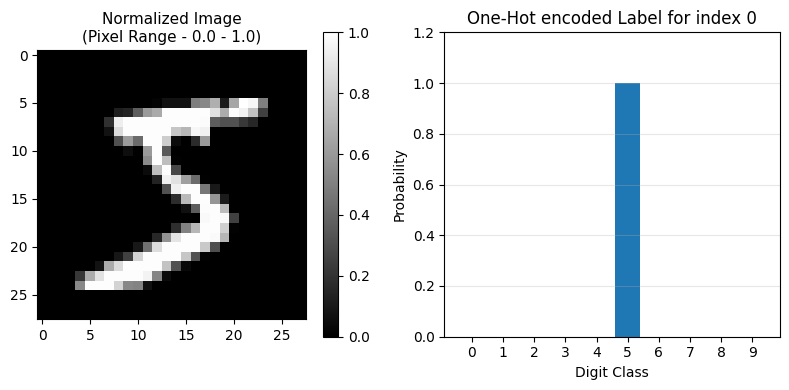

In [11]:
# Visualizing Preprocessed data
sample_idx = 0
plt.figure(figsize=(8,4))

# Shows normalised data
plt.subplot(1,2,1)
plt.imshow(X_train[sample_idx], cmap='gray')
plt.title(f"Normalized Image\n(Pixel Range - 0.0 - 1.0)", fontsize = 11)
plt.colorbar()

# Shows One-Hot encoded label
plt.subplot(1,2,2)
plt.bar(range(10), y_train[sample_idx])
plt.xlabel('Digit Class')
plt.ylabel('Probability')
plt.title(f"One-Hot encoded Label for index {sample_idx}")
plt.xticks(range(10))
plt.ylim([0,1.2])
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## Neural Network Model

In [12]:
# Building the model
print("\n" + "=" * 60)
print("BUILDING THE NEURAL NETWORK")
print("=" * 60)

model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128,activation='relu',name='hidden_layer_1'),
    Dropout(0.2, name='dropout_1'),
    Dense(64,activation='relu',name='hidden_layer_2'),
    Dropout(0.2, name='dropout_2'),
    Dense(10,activation='softmax',name='output'),
])

model.summary()
print("Model Architecture Created!")


BUILDING THE NEURAL NETWORK


c:\Users\Sattam Das\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_1 (Dense)          │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

Model Architecture Created!


## Compiling the Model

In [14]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

print("✓ Model compiled successfully!")

✓ Model compiled successfully!


## Training the Model

In [19]:
print("\n" + "=" * 60)
print("TRAINING THE MODEL")
print("=" * 60)

# SET TRAINING PARAMETERS

print("\n--- Training Configuration ---")

EPOCHS = 10
BATCH_SIZE = 32
VALIDATION_SPLIT = 0.2

print(f"Epochs:           {EPOCHS}")
print(f"Batch size:       {BATCH_SIZE}")
print(f"Validation split: {VALIDATION_SPLIT} (20%)")
print(f"\nThis means:")
print(f"  • Training on:   {int(60000 * (1 - VALIDATION_SPLIT)):,} images")
print(f"  • Validating on: {int(60000 * VALIDATION_SPLIT):,} images")
print(f"  • Batches per epoch: {int(60000 * (1 - VALIDATION_SPLIT) / BATCH_SIZE)}")
print(f"  • Total weight updates: {int(60000 * (1 - VALIDATION_SPLIT) / BATCH_SIZE) * EPOCHS:,}")

# TRAINING START
import time
start_time = time.time()

history = model.fit(
    X_train,y_train,
    validation_split = VALIDATION_SPLIT,
    epochs = EPOCHS,
    batch_size = BATCH_SIZE,
    verbose = 1
)

end_time = time.time()
training_time = end_time - start_time

print("\n" + "=" * 60)
print("TRAINING COMPLETE! ✓")
print("=" * 60)

print(f"\nTotal training time: {training_time:.2f} seconds ({training_time/60:.2f} minutes)")
print(f"Average time per epoch: {training_time/EPOCHS:.2f} seconds")




TRAINING THE MODEL

--- Training Configuration ---
Epochs:           10
Batch size:       32
Validation split: 0.2 (20%)

This means:
  • Training on:   48,000 images
  • Validating on: 12,000 images
  • Batches per epoch: 1500
  • Total weight updates: 15,000
Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9814 - loss: 0.0574 - val_accuracy: 0.9746 - val_loss: 0.0923
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9818 - loss: 0.0569 - val_accuracy: 0.9750 - val_loss: 0.0870
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9830 - loss: 0.0544 - val_accuracy: 0.9788 - val_loss: 0.0850
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9827 - loss: 0.0526 - val_accuracy: 0.9768 - val_loss: 0.0935
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9831 - loss: 0.0509 - val_accuracy: 0.9784 - val_loss: 0.0835
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9850 - loss: 0.0475 

In [23]:
# TRAINING HISTORY
print("\n" + "=" * 60)
print("TRAINING HISTORY SUMMARY")
print("=" * 60)

# Get the metrics from the history
train_loss = history.history['loss']
train_acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

print(f'\nFirst Epoch')
print(f" Training Loss: {train_loss[0]:.4f}")
print(f" Training Accuracy: {train_acc[0]:.4f} ({train_acc[0]*100:.2f}%)")
print(f" Validation Loss: {val_loss[0]:.4f}")
print(f" Validation Accuracy: {val_acc[0]:.4f} ({val_acc[0]*100:.2f}%)")

print(f'\nFinal Epoch')
print(f" Training Loss: {train_loss[-1]:.4f}")
print(f" Training Accuracy: {train_acc[-1]:.4f} ({train_acc[-1]*100:.2f}%)")
print(f" Validation Loss: {val_loss[-1]:.4f}")
print(f" Validation Accuracy: {val_acc[-1]:.4f} ({val_acc[-1]*100:.2f}%)")

print(f"\nImprovement:")
print(f"  Training Accuracy:   +{(train_acc[-1] - train_acc[0])*100:.2f}%")
print(f"  Validation Accuracy: +{(val_acc[-1] - val_acc[0])*100:.2f}%")



TRAINING HISTORY SUMMARY

First Epoch
 Training Loss: 0.0574
 Training Accuracy: 0.9814 (98.14%)
 Validation Loss: 0.0923
 Validation Accuracy: 0.9746 (97.46%)

Final Epoch
 Training Loss: 0.0414
 Training Accuracy: 0.9867 (98.67%)
 Validation Loss: 0.0994
 Validation Accuracy: 0.9776 (97.76%)

Improvement:
  Training Accuracy:   +0.53%
  Validation Accuracy: +0.30%


In [24]:
# CHECK FOR OVERFITTING

print("\n" + "=" * 60)
print("OVERFITTING ANALYSIS")
print("=" * 60)

accuracy_gap = train_acc[-1] - val_acc[-1]
loss_gap = val_loss[-1] - train_loss[-1]

print(f"\nFinal Accuracy Gap: {accuracy_gap*100:.2f}%")
print(f"  (Training - Validation)")

if accuracy_gap < 0.02:
    print("  ✓ Excellent! No significant overfitting detected.")
elif accuracy_gap < 0.05:
    print("  ✓ Good! Minimal overfitting.")
elif accuracy_gap < 0.10:
    print("  ⚠ Moderate overfitting. Consider more dropout or regularization.")
else:
    print("  ⚠ Significant overfitting! Model memorizing training data.")

print(f"\nFinal Loss Gap: {loss_gap:.4f}")
print(f"  (Validation - Training)")

if loss_gap < 0.1:
    print("  ✓ Loss values are close - good generalization!")
else:
    print("  ⚠ Validation loss higher than training - some overfitting present.")

# ============================================
# DISPLAY EPOCH-BY-EPOCH PROGRESS
# ============================================

print("\n" + "=" * 60)
print("EPOCH-BY-EPOCH BREAKDOWN")
print("=" * 60)

print(f"\n{'Epoch':<8} {'Train Loss':<12} {'Train Acc':<12} {'Val Loss':<12} {'Val Acc':<12}")
print("-" * 60)

for i in range(EPOCHS):
    print(f"{i+1:<8} {train_loss[i]:<12.4f} {train_acc[i]:<12.4f} {val_loss[i]:<12.4f} {val_acc[i]:<12.4f}")



OVERFITTING ANALYSIS

Final Accuracy Gap: 0.91%
  (Training - Validation)
  ✓ Excellent! No significant overfitting detected.

Final Loss Gap: 0.0580
  (Validation - Training)
  ✓ Loss values are close - good generalization!

EPOCH-BY-EPOCH BREAKDOWN

Epoch    Train Loss   Train Acc    Val Loss     Val Acc     
------------------------------------------------------------
1        0.0574       0.9814       0.0923       0.9746      
2        0.0569       0.9818       0.0870       0.9750      
3        0.0544       0.9830       0.0850       0.9788      
4        0.0526       0.9827       0.0935       0.9768      
5        0.0509       0.9831       0.0835       0.9784      
6        0.0475       0.9850       0.0840       0.9779      
7        0.0462       0.9848       0.0904       0.9776      
8        0.0459       0.9846       0.0927       0.9779      
9        0.0420       0.9861       0.0939       0.9768      
10       0.0414       0.9867       0.0994       0.9776      


## Visualising Training Performance


--- Accuracy Plot ---


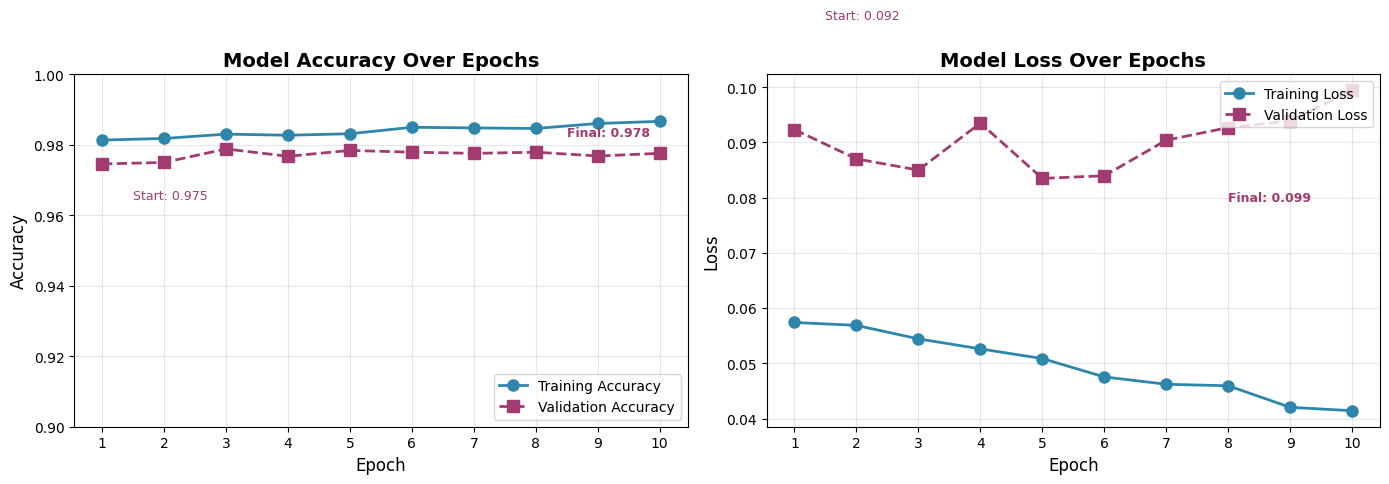


--- Creating Combined Metrics Plot ---


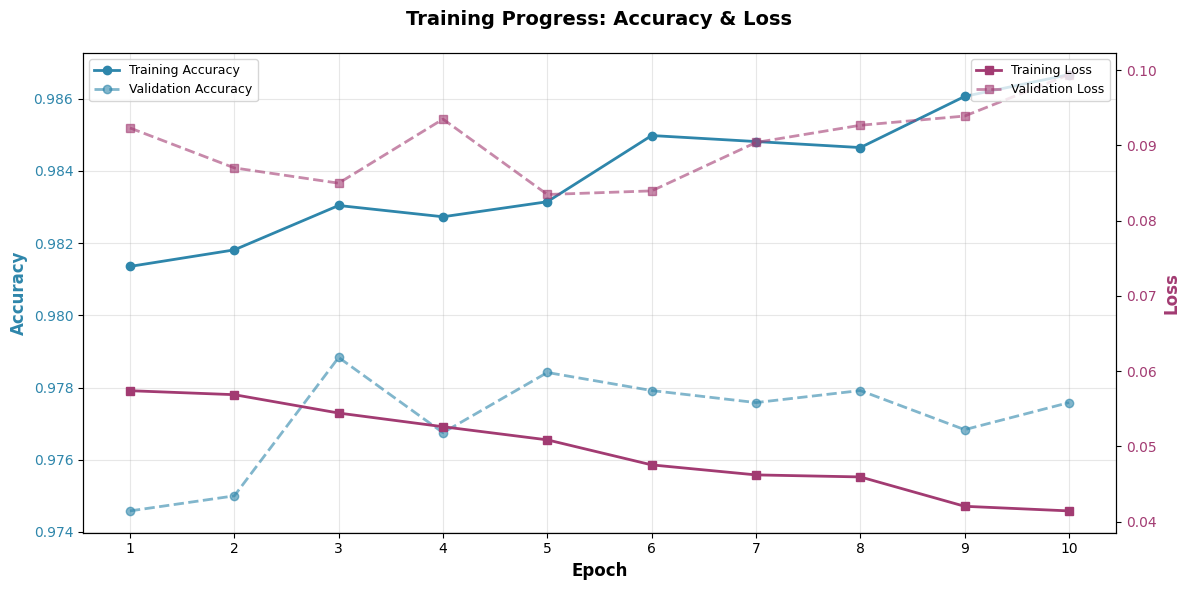

✓ Combined metrics plot created!

CURVE ANALYSIS

✓ Validation accuracy improved by 0.30%
  Model is learning successfully!

✓ Model has converged (accuracy stabilized)
  Training could be stopped here

⚠ Overfitting is increasing over time
  Consider adding more dropout or stopping earlier


In [31]:
# PLOT 1: TRAINING & VALIDATION ACCURACY

print("\n--- Accuracy Plot ---")

plt.figure(figsize=(14, 5))

# Subplot 1: Accuracy
plt.subplot(1, 2, 1)
plt.plot(range(1, EPOCHS + 1), history.history['accuracy'], 
         marker='o', linestyle='-', linewidth=2, markersize=8, 
         label='Training Accuracy', color='#2E86AB')
plt.plot(range(1, EPOCHS + 1), history.history['val_accuracy'], 
         marker='s', linestyle='--', linewidth=2, markersize=8, 
         label='Validation Accuracy', color='#A23B72')

plt.title('Model Accuracy Over Epochs', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend(loc='lower right', fontsize=10)
plt.grid(True, alpha=0.3)
plt.xticks(range(1, EPOCHS + 1))
plt.ylim([0.9, 1.0])

# Add annotations for first and last epoch
plt.annotate(f'Start: {history.history["val_accuracy"][0]:.3f}', 
             xy=(1, history.history['val_accuracy'][0]), 
             xytext=(1.5, history.history['val_accuracy'][0] - 0.01),
             fontsize=9, color='#A23B72')
plt.annotate(f'Final: {history.history["val_accuracy"][-1]:.3f}', 
             xy=(EPOCHS, history.history['val_accuracy'][-1]), 
             xytext=(EPOCHS - 1.5, history.history['val_accuracy'][-1] + 0.005),
             fontsize=9, color='#A23B72', fontweight='bold')

# PLOT 2: TRAINING & VALIDATION LOSS
plt.subplot(1, 2, 2)
plt.plot(range(1, EPOCHS + 1), history.history['loss'], 
         marker='o', linestyle='-', linewidth=2, markersize=8, 
         label='Training Loss', color='#2E86AB')
plt.plot(range(1, EPOCHS + 1), history.history['val_loss'], 
         marker='s', linestyle='--', linewidth=2, markersize=8, 
         label='Validation Loss', color='#A23B72')

plt.title('Model Loss Over Epochs', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend(loc='upper right', fontsize=10)
plt.grid(True, alpha=0.3)
plt.xticks(range(1, EPOCHS + 1))

# Add annotations for first and last epoch
plt.annotate(f'Start: {history.history["val_loss"][0]:.3f}', 
             xy=(1, history.history['val_loss'][0]), 
             xytext=(1.5, history.history['val_loss'][0] + 0.02),
             fontsize=9, color='#A23B72')
plt.annotate(f'Final: {history.history["val_loss"][-1]:.3f}', 
             xy=(EPOCHS, history.history['val_loss'][-1]), 
             xytext=(EPOCHS - 2, history.history['val_loss'][-1] - 0.02),
             fontsize=9, color='#A23B72', fontweight='bold')

plt.tight_layout()
plt.show()

print("\n--- Creating Combined Metrics Plot ---")

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot accuracy on left y-axis
color = '#2E86AB'
ax1.set_xlabel('Epoch', fontsize=12, fontweight='bold')
ax1.set_ylabel('Accuracy', color=color, fontsize=12, fontweight='bold')
ax1.plot(range(1, EPOCHS + 1), history.history['accuracy'], 
         marker='o', linestyle='-', linewidth=2, markersize=6, 
         label='Training Accuracy', color=color)
ax1.plot(range(1, EPOCHS + 1), history.history['val_accuracy'], 
         marker='o', linestyle='--', linewidth=2, markersize=6, 
         label='Validation Accuracy', color=color, alpha=0.6)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True, alpha=0.3)
ax1.set_xticks(range(1, EPOCHS + 1))

# Plot loss on right y-axis
ax2 = ax1.twinx()
color = '#A23B72'
ax2.set_ylabel('Loss', color=color, fontsize=12, fontweight='bold')
ax2.plot(range(1, EPOCHS + 1), history.history['loss'], 
         marker='s', linestyle='-', linewidth=2, markersize=6, 
         label='Training Loss', color=color)
ax2.plot(range(1, EPOCHS + 1), history.history['val_loss'], 
         marker='s', linestyle='--', linewidth=2, markersize=6, 
         label='Validation Loss', color=color, alpha=0.6)
ax2.tick_params(axis='y', labelcolor=color)

# Add title and legends
plt.title('Training Progress: Accuracy & Loss', fontsize=14, fontweight='bold', pad=20)
ax1.legend(loc='upper left', fontsize=9)
ax2.legend(loc='upper right', fontsize=9)

fig.tight_layout()
plt.show()

print("✓ Combined metrics plot created!")

# ============================================
# ANALYZE THE CURVES
# ============================================

print("\n" + "=" * 60)
print("CURVE ANALYSIS")
print("=" * 60)

# Check if validation accuracy is improving
if history.history['val_accuracy'][-1] > history.history['val_accuracy'][0]:
    improvement = (history.history['val_accuracy'][-1] - history.history['val_accuracy'][0]) * 100
    print(f"\n✓ Validation accuracy improved by {improvement:.2f}%")
    print("  Model is learning successfully!")
else:
    print("\n⚠ Validation accuracy did not improve")
    print("  Consider training for more epochs or adjusting hyperparameters")

# Check convergence
last_3_acc = history.history['val_accuracy'][-3:]
if max(last_3_acc) - min(last_3_acc) < 0.005:
    print("\n✓ Model has converged (accuracy stabilized)")
    print("  Training could be stopped here")
else:
    print("\n⚠ Model still improving in last epochs")
    print("  Consider training for a few more epochs")

# Check overfitting progression
acc_gaps = [train - val for train, val in zip(history.history['accuracy'], 
                                               history.history['val_accuracy'])]
if acc_gaps[-1] > acc_gaps[0]:
    print("\n⚠ Overfitting is increasing over time")
    print("  Consider adding more dropout or stopping earlier")
else:
    print("\n✓ Overfitting is not increasing")
    print("  Model is generalizing well")


## Final Evaluation

In [32]:
# EVALUATION ON TEST DATA
print("\n" + "=" * 60)
print("FINAL EVALUATION ON TEST DATA")
print("=" * 60)

print("\n--- Evaluating on 10,000 test images ---")
test_loss, test_accuracy = model.evaluate(X_test,y_test,verbose=1)

print("\n" + "=" * 60)
print("FINAL TEST RESULTS")
print("=" * 60)
print(f"Test Loss:     {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f} ({test_accuracy * 100:.2f}%)")


FINAL EVALUATION ON TEST DATA

--- Evaluating on 10,000 test images ---
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 834us/step - accuracy: 0.9798 - loss: 0.0884

FINAL TEST RESULTS
Test Loss:     0.0884
Test Accuracy: 0.9798 (97.98%)


In [33]:
# COMPARING ALL THREE SETS

print("\n" + "=" * 60)
print("PERFORMANCE COMPARISON")
print("=" * 60)

final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]

print(f"\n{'Dataset':<20} {'Accuracy':<15} {'Performance'}")
print("-" * 60)
print(f"{'Training Set':<20} {final_train_acc * 100:>6.2f}%        (Data used for learning)")
print(f"{'Validation Set':<20} {final_val_acc * 100:>6.2f}%        (Data used for monitoring)")
print(f"{'Test Set':<20} {test_accuracy * 100:>6.2f}%        (Completely unseen data)")

# Check consistency
print(f"\n{'Metric':<30} {'Value'}")
print("-" * 60)
print(f"{'Train - Validation gap':<30} {abs(final_train_acc - final_val_acc) * 100:>6.2f}%")
print(f"{'Validation - Test gap':<30} {abs(final_val_acc - test_accuracy) * 100:>6.2f}%")

if abs(final_val_acc - test_accuracy) < 0.01:
    print("\n✓ Excellent! Test accuracy matches validation - model generalizes well!")
elif abs(final_val_acc - test_accuracy) < 0.02:
    print("\n✓ Good! Test accuracy is close to validation - consistent performance!")
else:
    print("\n⚠ Test accuracy differs from validation - some variance present")


PERFORMANCE COMPARISON

Dataset              Accuracy        Performance
------------------------------------------------------------
Training Set          98.67%        (Data used for learning)
Validation Set        97.76%        (Data used for monitoring)
Test Set              97.98%        (Completely unseen data)

Metric                         Value
------------------------------------------------------------
Train - Validation gap           0.91%
Validation - Test gap            0.22%

✓ Excellent! Test accuracy matches validation - model generalizes well!


In [34]:
# MAKING PREDICTIONS
print("\n" + "=" * 60)
print("GENERATING PREDICTIONS")
print("=" * 60)

print("\n--- Making predictions on all 10,000 test images ---")

predictions = model.predict(X_test, verbose=0)

print(f"✓ Predictions generated!")
print(f"Prediction shape: {predictions.shape}")
print(f"  (10,000 images × 10 probability values)")

# Convert predictions and true labels to class numbers
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)


GENERATING PREDICTIONS

--- Making predictions on all 10,000 test images ---
✓ Predictions generated!
Prediction shape: (10000, 10)
  (10,000 images × 10 probability values)


In [35]:
# DETAILED PERFORMANCE METRICS
print("\n" + "=" * 60)
print("DETAILED PERFORMANCE METRICS")
print("=" * 60)

from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(true_classes, predicted_classes, 
                               target_names=[f'Digit {i}' for i in range(10)],
                               digits=4)

print("\n" + report)

print("\nMetric Explanations:")
print("  • Precision: Of all times model predicted this digit, how many were correct?")
print("  • Recall: Of all actual instances of this digit, how many did model find?")
print("  • F1-score: Harmonic mean of precision and recall")
print("  • Support: Number of actual instances of this digit in test set")


DETAILED PERFORMANCE METRICS

              precision    recall  f1-score   support

     Digit 0     0.9858    0.9888    0.9873       980
     Digit 1     0.9902    0.9841    0.9872      1135
     Digit 2     0.9797    0.9845    0.9821      1032
     Digit 3     0.9622    0.9832    0.9726      1010
     Digit 4     0.9827    0.9817    0.9822       982
     Digit 5     0.9885    0.9675    0.9779       892
     Digit 6     0.9822    0.9812    0.9817       958
     Digit 7     0.9739    0.9796    0.9767      1028
     Digit 8     0.9713    0.9713    0.9713       974
     Digit 9     0.9820    0.9742    0.9781      1009

    accuracy                         0.9798     10000
   macro avg     0.9799    0.9796    0.9797     10000
weighted avg     0.9799    0.9798    0.9798     10000


Metric Explanations:
  • Precision: Of all times model predicted this digit, how many were correct?
  • Recall: Of all actual instances of this digit, how many did model find?
  • F1-score: Harmonic mean of pr

In [36]:
# FIND BEST AND WORST PERFORMING DIGITS
cm = confusion_matrix(true_classes, predicted_classes)

# Calculate per-digit accuracy
digit_accuracy = cm.diagonal() / cm.sum(axis=1)

print("\n" + "=" * 60)
print("PER-DIGIT PERFORMANCE")
print("=" * 60)

print(f"\n{'Digit':<10} {'Accuracy':<12} {'Correct/Total':<20} {'Performance'}")
print("-" * 70)

for digit in range(10):
    total = cm[digit].sum()
    correct = cm[digit, digit]
    acc = digit_accuracy[digit]
    
    if acc >= 0.98:
        performance = "★★★ Excellent"
    elif acc >= 0.95:
        performance = "★★  Very Good"
    elif acc >= 0.90:
        performance = "★   Good"
    else:
        performance = "⚠   Needs Improvement"
    
    print(f"Digit {digit:<5} {acc * 100:>6.2f}%      {correct:>4}/{total:<4}           {performance}")

# Find best and worst
best_digit = np.argmax(digit_accuracy)
worst_digit = np.argmin(digit_accuracy)

print(f"\n✓ Best performing digit:  {best_digit} ({digit_accuracy[best_digit] * 100:.2f}% accuracy)")
print(f"⚠ Worst performing digit: {worst_digit} ({digit_accuracy[worst_digit] * 100:.2f}% accuracy)")


PER-DIGIT PERFORMANCE

Digit      Accuracy     Correct/Total        Performance
----------------------------------------------------------------------
Digit 0      98.88%       969/980            ★★★ Excellent
Digit 1      98.41%      1117/1135           ★★★ Excellent
Digit 2      98.45%      1016/1032           ★★★ Excellent
Digit 3      98.32%       993/1010           ★★★ Excellent
Digit 4      98.17%       964/982            ★★★ Excellent
Digit 5      96.75%       863/892            ★★  Very Good
Digit 6      98.12%       940/958            ★★★ Excellent
Digit 7      97.96%      1007/1028           ★★  Very Good
Digit 8      97.13%       946/974            ★★  Very Good
Digit 9      97.42%       983/1009           ★★  Very Good

✓ Best performing digit:  0 (98.88% accuracy)
⚠ Worst performing digit: 5 (96.75% accuracy)


## Overall Model Assessment

In [37]:

print("\n" + "=" * 60)
print("OVERALL MODEL ASSESSMENT")
print("=" * 60)

print(f"\n📊 Final Test Accuracy: {test_accuracy * 100:.2f}%")

if test_accuracy >= 0.98:
    grade = "A+"
    assessment = "Outstanding! Professional-grade performance."
elif test_accuracy >= 0.97:
    grade = "A"
    assessment = "Excellent! Very strong model."
elif test_accuracy >= 0.95:
    grade = "B+"
    assessment = "Very good! Solid performance."
elif test_accuracy >= 0.90:
    grade = "B"
    assessment = "Good! Room for improvement."
else:
    grade = "C"
    assessment = "Needs work. Consider model improvements."

print(f"Grade: {grade}")
print(f"Assessment: {assessment}")


OVERALL MODEL ASSESSMENT

📊 Final Test Accuracy: 97.98%
Grade: A
Assessment: Excellent! Very strong model.


## Confusion Matrix Visualization

Confusion Matrix Heatmap


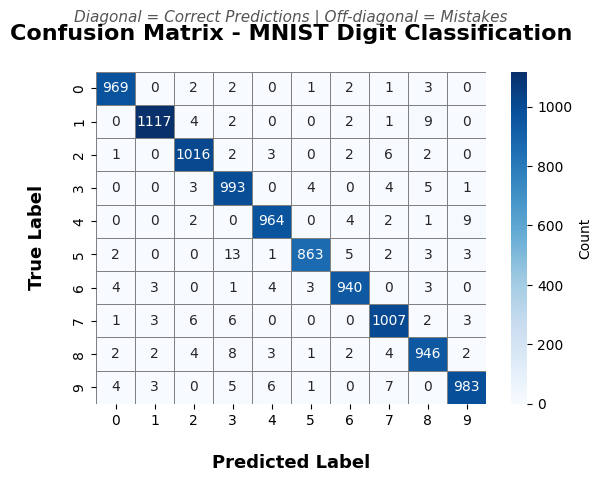

✓ Confusion matrix heatmap created!


In [46]:
# CONFUSION MATRIX HEATMAP
print("=" * 60)
print("Confusion Matrix Heatmap")
print("=" * 60)

plt.figure(figsize=(6, 5))

# Create heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=range(10), yticklabels=range(10),
            cbar_kws={'label': 'Count'},
            linewidths=0.5, linecolor='gray')

plt.title('Confusion Matrix - MNIST Digit Classification\n', 
          fontsize=16, fontweight='bold')
plt.xlabel('\nPredicted Label', fontsize=13, fontweight='bold')
plt.ylabel('True Label\n', fontsize=13, fontweight='bold')

# Add text explanation
plt.text(5, -1.5, 
         'Diagonal = Correct Predictions | Off-diagonal = Mistakes', 
         ha='center', fontsize=11, style='italic', color='#555')

plt.tight_layout()
plt.show()

print("✓ Confusion matrix heatmap created!")

Normalized Confusion Matrix


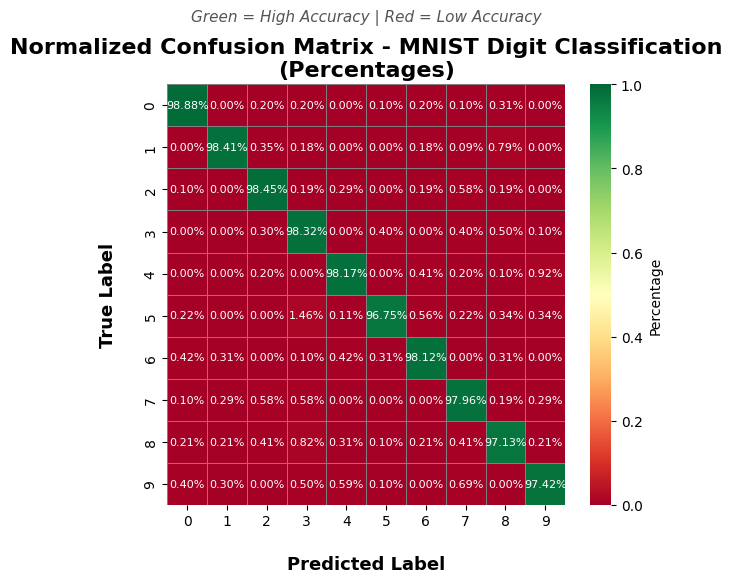

✓ Normalized confusion matrix created!


In [54]:
print("=" * 60)
print("Normalized Confusion Matrix")
print("=" * 60)

# Normalize by row (show percentages)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(6, 6))

sns.heatmap(cm_normalized, annot=True, fmt='.2%', cmap='RdYlGn', 
            xticklabels=range(10), yticklabels=range(10),
            cbar_kws={'label': 'Percentage'},
            linewidths=0.5, linecolor='gray',
            vmin=0, vmax=1,
            annot_kws={'fontsize': 8})

plt.title('Normalized Confusion Matrix - MNIST Digit Classification\n(Percentages)', 
          fontsize=16, fontweight='bold')
plt.xlabel('\nPredicted Label', fontsize=13, fontweight='bold')
plt.ylabel('True Label\n', fontsize=13, fontweight='bold')

# Add text explanation
plt.text(5, -1.5, 
         'Green = High Accuracy | Red = Low Accuracy', 
         ha='center', fontsize=11, style='italic', color='#555')

plt.tight_layout()
plt.show()

print("✓ Normalized confusion matrix created!")

## Individual Tests Analysis


TESTING ON INDIVIDUAL IMAGES

--- Randomly selecting test images ---


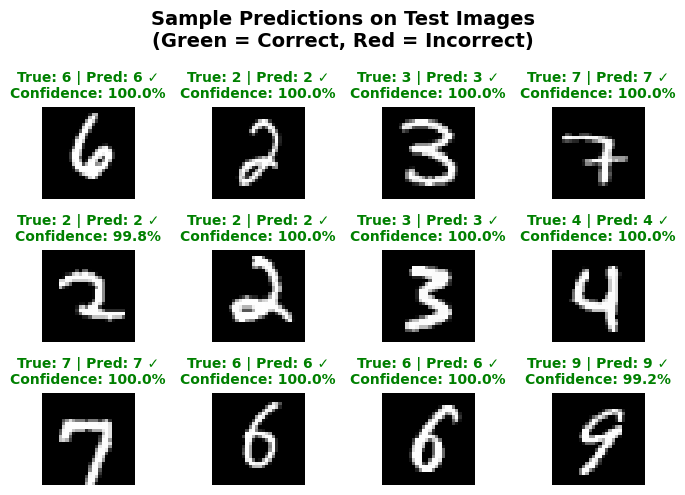

✓ Individual prediction samples displayed!


In [ ]:
# TEST ON INDIVIDUAL IMAGES

print("\n" + "=" * 60)
print("TESTING ON INDIVIDUAL IMAGES")
print("=" * 60)

print("\n--- Randomly selecting test images ---")

# Select 12 random test images
np.random.seed(42)  # For reproducibility
random_indices = np.random.choice(len(X_test), 12, replace=False)

plt.figure(figsize=(7, 5))

for i, idx in enumerate(random_indices):
    # Get image and true label
    image = X_test[idx]
    true_label = true_classes[idx]
    
    # Make prediction
    prediction_probs = predictions[idx]
    predicted_label = predicted_classes[idx]
    confidence = np.max(prediction_probs) * 100
    
    # Plot
    plt.subplot(3, 4, i + 1)
    plt.imshow(image, cmap='gray')
    
    # Color code: green if correct, red if wrong
    if predicted_label == true_label:
        color = 'green'
        result = '✓'
    else:
        color = 'red'
        result = '✗'
    
    plt.title(f'True: {true_label} | Pred: {predicted_label} {result}\nConfidence: {confidence:.1f}%', 
              fontsize=10, color=color, fontweight='bold')
    plt.axis('off')

plt.suptitle('Sample Predictions on Test Images\n(Green = Correct, Red = Incorrect)', 
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("✓ Individual prediction samples displayed!")


--- Finding misclassified examples ---
Total mistakes found: 202

--- Displaying some misclassified images ---


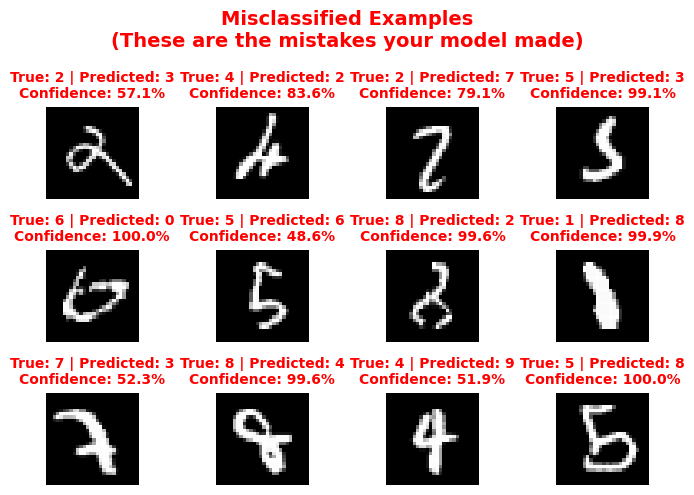

✓ Misclassified examples displayed!


In [61]:
# Mispredicted Datas
print("\n--- Finding misclassified examples ---")

# Find all mistakes
mistake_indices = np.where(predicted_classes != true_classes)[0]

print(f"Total mistakes found: {len(mistake_indices)}")

if len(mistake_indices) > 0:
    print("\n--- Displaying some misclassified images ---")
    
    # Show first 12 mistakes (or fewer if less than 12)
    num_to_show = min(12, len(mistake_indices))
    
    plt.figure(figsize=(7, 5))
    
    for i in range(num_to_show):
        idx = mistake_indices[i]
        
        image = X_test[idx]
        true_label = true_classes[idx]
        predicted_label = predicted_classes[idx]
        confidence = np.max(predictions[idx]) * 100
        
        plt.subplot(3, 4, i + 1)
        plt.imshow(image, cmap='gray')
        plt.title(f'True: {true_label} | Predicted: {predicted_label}\nConfidence: {confidence:.1f}%', 
                  fontsize=10, color='red', fontweight='bold')
        plt.axis('off')
    
    plt.suptitle('Misclassified Examples\n(These are the mistakes your model made)', 
                 fontsize=14, fontweight='bold', color='red')
    plt.tight_layout()
    plt.show()
    
    print("✓ Misclassified examples displayed!")